In [3]:
import numpy as np

In [4]:
def simple_gradient_calculation(w, a):
    w1, w2 = w
    a1, a2, a3 = a

    z1 = a1 * w1 * w2
    z2 = a2 * w1 + a3 * w2 ** 2

    J = z1 * np.exp(z1 * z2)

    dJ_dw1 = (1 + z1 * z2) * a1 * w2 * np.exp(z1 * z2) + a2 * z1 ** 2 * np.exp(z1 * z2)
    dJ_dw2 = (1 + z1 * z2) * a1 * w2 * np.exp(z1 * z2)

    # J(w), ∇J(w)
    return J, np.hstack((dJ_dw1, dJ_dw2))

In [5]:
def Jeval_gradient_with_a_logarithmic_loss(w, b, X, y):
    y_hat = X @ w + b  # (@) equivalent to np.dot() for 2-D arrays
    # See also: https://stackoverflow.com/questions/34142485/difference-between-numpy-dot-and-python-3-5-matrix-multiplication

    log_diff = np.log(y) - np.log(y_hat)  # εi

    J = np.sum(log_diff ** 2)
    Jgradw = -2 * (np.sum(log_diff) / y_hat) @ X

    Jgradb = -2 * (np.sum(log_diff) / y_hat)

    return J, Jgradw, Jgradb

In [6]:
def Jeval_gradient_with_an_inverse_function(w, X, y):
    w0 = w[0]
    w_rest = w[1:]  # j = 1, ..., d

    z = w0 + np.sum(X @ w_rest)

    residuals = y - 1 / z
    J = np.sum(residuals ** 2)

    Jgrad0 = 2 * np.sum(residuals / z ** 2)
    Jgrad1 = 2 * (residuals / z ** 2) @ X
    Jgrad = np.hstack((Jgrad0, Jgrad1))

    return J, Jgrad


In [22]:
def Jeval_gradient_with_nonlinear_parametrization(a, b, x, y):
    def sigmoid(z):
        return np.exp(z) / (1 + np.exp(z))

    X_b = np.expand_dims(x, axis=1) - b
    Z = a * np.exp(-(X_b) ** 2 / 2)
    z = np.sum(Z, axis=1)

    J = np.sum(np.log(1 + np.exp(z)) - y * z)

    dz_da = np.sum(sigmoid(z) - y) * np.exp(-(X_b) ** 2 / 2)
    dz_db = np.sum(sigmoid(z) - y) * a * np.exp(-(X_b) ** 2 / 2) * (X_b)


    Jgrad = np.hstack((dz_da, dz_db))
    return J, Jgrad

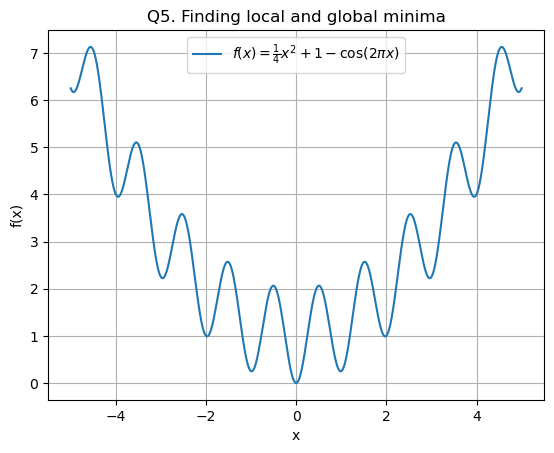

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return (1/4) * x**2 + 1 - np.cos(2 * np.pi * x)

x = np.linspace(-5, 5, 1000)
y = f(x)

plt.plot(x, y, label=r"$f(x) = \frac{1}{4}x^2 + 1 - \cos(2\pi x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Q5. Finding local and global minima")
plt.grid(True)
plt.legend()
plt.show()

In [44]:
def matrix_minimization(P, X, y):
    n = y.shape[0] 
    J = 0
    grad_P = np.zeros_like(P) 

    for i in range(n):
        x_i = X[:, i].reshape(-1, 1) 
        z_i = x_i.T @ P @ x_i 
        J += (z_i / y[i]) - np.log(z_i)  
        grad_P += (1 / y[i] - 1 / z_i) * (x_i @ x_i.T)  

    return J, grad_P

In [62]:
def matrix_minimization_broadcasting(P, X, y):

    Z = np.diagonal(X.T @ P @ X)
    
    J = np.sum(Z / y - np.log(Z))
    
    weight = (1 / y - 1 / Z)[:, None, None] 
    grad_P = np.sum(weight * X.T[:, :, None] * X.T[:, None, :], axis=0) 
    
    return J, grad_P

In [63]:
# Set random seed for reproducibility
np.random.seed(0)

# Parameters
m = 3   # Dimension of x_i and P
n = 5   # Number of samples

# Randomly initialize matrix P (m x m), ensuring it's symmetric for covariance-like structure
P = np.random.rand(m, m)
P = (P + P.T) / 2  # Make P symmetric

# Randomly initialize X (m x n) and y (n,)
X = np.random.rand(m, n)
y = np.random.rand(n) + 0.1  # Adding 0.1 to ensure no zero values in y

# Test the function
J, grad_P = matrix_minimization(P, X, y)

print("Loss J(P):", J)
print("Gradient grad_P:")
print(grad_P)

Loss J(P): [[19.03010943]]
Gradient grad_P:
[[3.37483163 1.40735002 4.4819017 ]
 [1.40735002 1.18525608 1.37583835]
 [4.4819017  1.37583835 6.79747507]]
